# Data Exploration part 3

Today, let's apply other exploratory  techniques to  better understand our corpus.

As usual, we will start by importing the packages, excluding stop-words and the extra sentence we saw yesterday.

In [ ]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from numpy import mean
from numpy import std
from numpy import percentile
import pandas as pd
import scipy

# get data
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

# define get_data function
def get_data(path):
  data = pd.read_csv(path, index_col=0)
  return data

#get the data
data = get_data('/tmp/sentiment.csv')

# clone package repository
!git clone https://github.com/vallantin/atalaia.git

# navigate to atalaia directory
%cd atalaia

# install packages requirements
!pip install -r requirements.txt

# install package
!python setup.py install

# import it
from atalaia.atalaia import Atalaia

# get a list with all the texts
texts = data.text

#start atalaia
atalaia = Atalaia('en')

# get the number of tokens in each sentence
# get the lengths
lens = [len(atalaia.tokenize(t)) for t in texts]
data['lengths'] = lens

#delete outliers
data = data.drop(index = [1228])

# lower everything
data['text'] = [atalaia.lower_remove_white(t) for t in data['text']]

# exclude stopwords
data['text'] = [atalaia.remove_stopwords(t) for t in data['text']]


--2020-07-12 19:20:06--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.100, 108.177.125.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6brh837l95oijglefals75u9vgsk610p/1594581600000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-07-12 19:20:07--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6brh837l95oijglefals75u9vgsk610p/1594581600000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74

Let's try to get the most representative words for our positive and for our negative corpus.

In [ ]:
def plot_representative_words_for_sentiment(sentences, data):
  # start atalaia
  atalaia = Atalaia('en')

  # transform into corpus
  sentences = atalaia.create_corpus(sentences)

  # get the representative words for 80% of the corpus
  token_data = atalaia.representative_tokens(0.8, 
                                            sentences,
                                            reverse=False)

  full_token_data                     = token_data.items()
  full_token_data_tokens, full_counts = zip(*full_token_data)

  token_data                          = list(full_token_data)[:10]
  tokens, counts                      = zip(*token_data)

  # plot
  plt.figure(figsize=(20,10))
  plt.bar(tokens, 
          counts, 
          color='b')
  plt.xlabel('Tokens');
  plt.ylabel('Counts');

  # return tokens list
  return full_token_data_tokens

Plot positive first

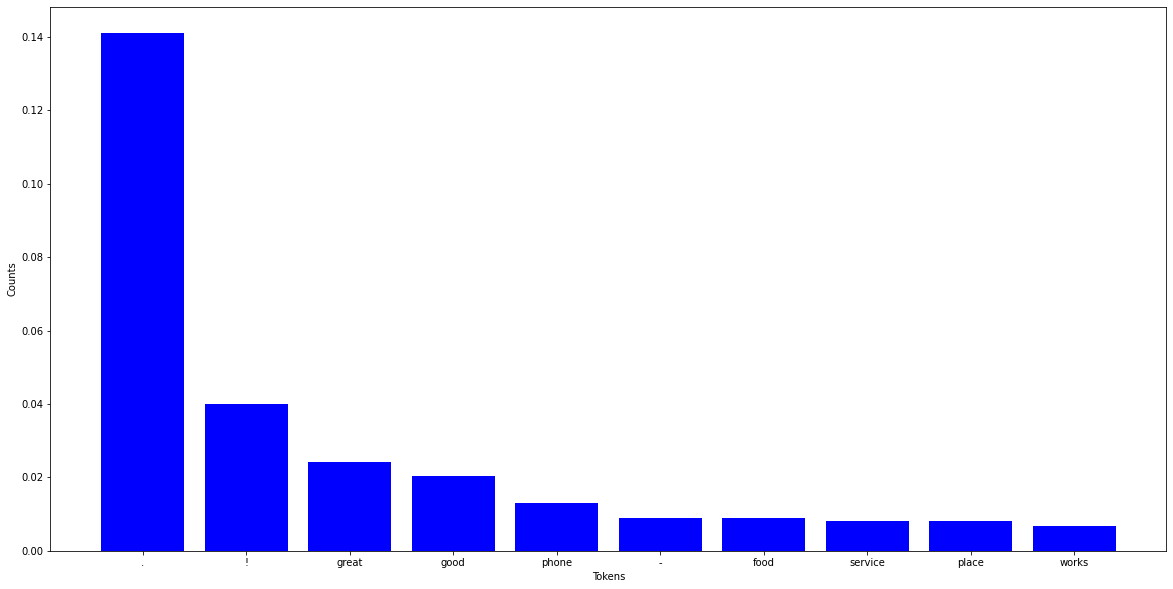

In [ ]:
  # get sentences
  positive        = list(data[data.sentiment  == 1]['text'])
  positive_tokens = plot_representative_words_for_sentiment(positive,data)

Now, plot negative.

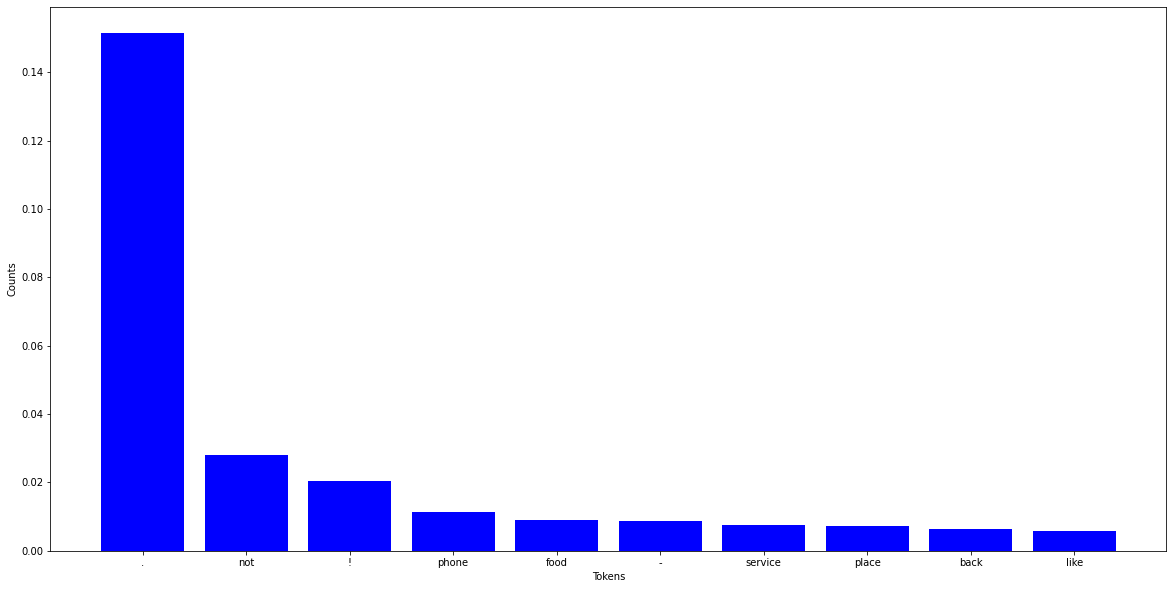

In [ ]:
  # get sentences
  negative        = list(data[data.sentiment  == 0]['text'])
  negative_tokens = plot_representative_words_for_sentiment(negative,data)

We saw that some tokens are common for both groups of sentences. "Phone", for instance, appears a lot on positive and on negative sentences. Same for "place" of for "food".

Which tokens account for 80% of the sentences and are on both sets of sentences?

In [ ]:
#get the intersection of negative and positive tokens
intersection = list(set(positive_tokens) & set(negative_tokens))
intersection

['tell',
 'want',
 'people',
 'burger',
 'definitely',
 'end',
 'worked',
 'others',
 'tasty',
 'headsets',
 'easy',
 'expected',
 'touch',
 'menu',
 'said',
 'good',
 '-',
 'wait',
 'server',
 'much',
 'came',
 'problems',
 'staff',
 'ever',
 'always',
 'right',
 'thats',
 'seems',
 'received',
 're',
 'every',
 '3',
 'comfortable',
 'full',
 'ago',
 'made',
 'day',
 'shrimp',
 'vegas',
 'motorola',
 '5',
 'life',
 '&',
 'belt',
 'come',
 'stars',
 'hit',
 'someone',
 'voice',
 'even',
 'nothing',
 'dining',
 'company',
 'need',
 'say',
 'dinner',
 'priced',
 'place',
 'bluetooth',
 'area',
 'back',
 'clear',
 'work',
 'oh',
 'loud',
 'time',
 'night',
 'provided',
 'love',
 'quality',
 'feature',
 'absolutely',
 'salad',
 '!',
 'super',
 'party',
 'no',
 'hands',
 'amazon',
 'lg',
 'samsung',
 'phone',
 'bars',
 'chicken',
 '%',
 'first',
 'best',
 'highly',
 'though',
 '20',
 'several',
 'call',
 'mobile',
 'service',
 'new',
 'wrong',
 'fresh',
 'hard',
 '"',
 ')',
 'disappointed',